##📌 EXTRACCIÓN

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/rubyseg/telecomx_ii/refs/heads/main/datos%20(1).csv'

In [2]:
datos = pd.read_csv(path)
datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges_Monthly,Charges_Total,Charges_Daily
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7039,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7040,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7041,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [3]:
datos.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges_Monthly', 'Charges_Total',
       'Charges_Daily'],
      dtype='object')

In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


##🛠️ Preparación de los Datos

In [5]:
# Eliminar columnas irrelevantes
datos = datos.drop(columns=['customerID'])

In [6]:
# Agrupar 'No' y 'No internet service'
columnas_agrupar = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                    'TechSupport', 'StreamingTV', 'StreamingMovies']

for col in columnas_agrupar:
    datos[col] = datos[col].replace('No internet service', 'No')

In [7]:
# One-hot encoding
cols_categoricas = [
       'Churn', 'gender', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'
]

df_encoded = pd.get_dummies(datos, columns=cols_categoricas, drop_first=True)
df_encoded

,SeniorCitizen,tenure,Charges_Monthly,Charges_Total,Charges_Daily,Churn_Yes,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,9,65.60,593.30,2.186667,False,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,9,59.90,542.40,1.996667,False,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.90,280.85,2.463333,True,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,13,98.00,1237.85,3.266667,True,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,3,83.90,267.40,2.796667,True,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,1.838333,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,0,22,85.10,1873.70,2.836667,True,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,2,50.30,92.75,1.676667,False,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,67,67.85,4627.65,2.261667,False,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   Charges_Monthly                        7043 non-null   float64
 3   Charges_Total                          7032 non-null   float64
 4   Charges_Daily                          7043 non-null   float64
 5   Churn_Yes                              7043 non-null   bool   
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [9]:
# Verificar datos nulos
df_encoded.isnull().sum()

,0
SeniorCitizen,0
tenure,0
Charges_Monthly,0
Charges_Total,11
Charges_Daily,0
Churn_Yes,0
gender_Male,0
Partner_Yes,0
Dependents_Yes,0
PhoneService_Yes,0


In [10]:
# Eliminar registros con datos nulos
df_encoded = df_encoded.dropna(subset=['Charges_Total'])

In [11]:
# Proporcion de Churn
df_encoded['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.734215
True,0.265785


## ≡ Correlación entre las variables

In [12]:
corr = df_encoded.corr()

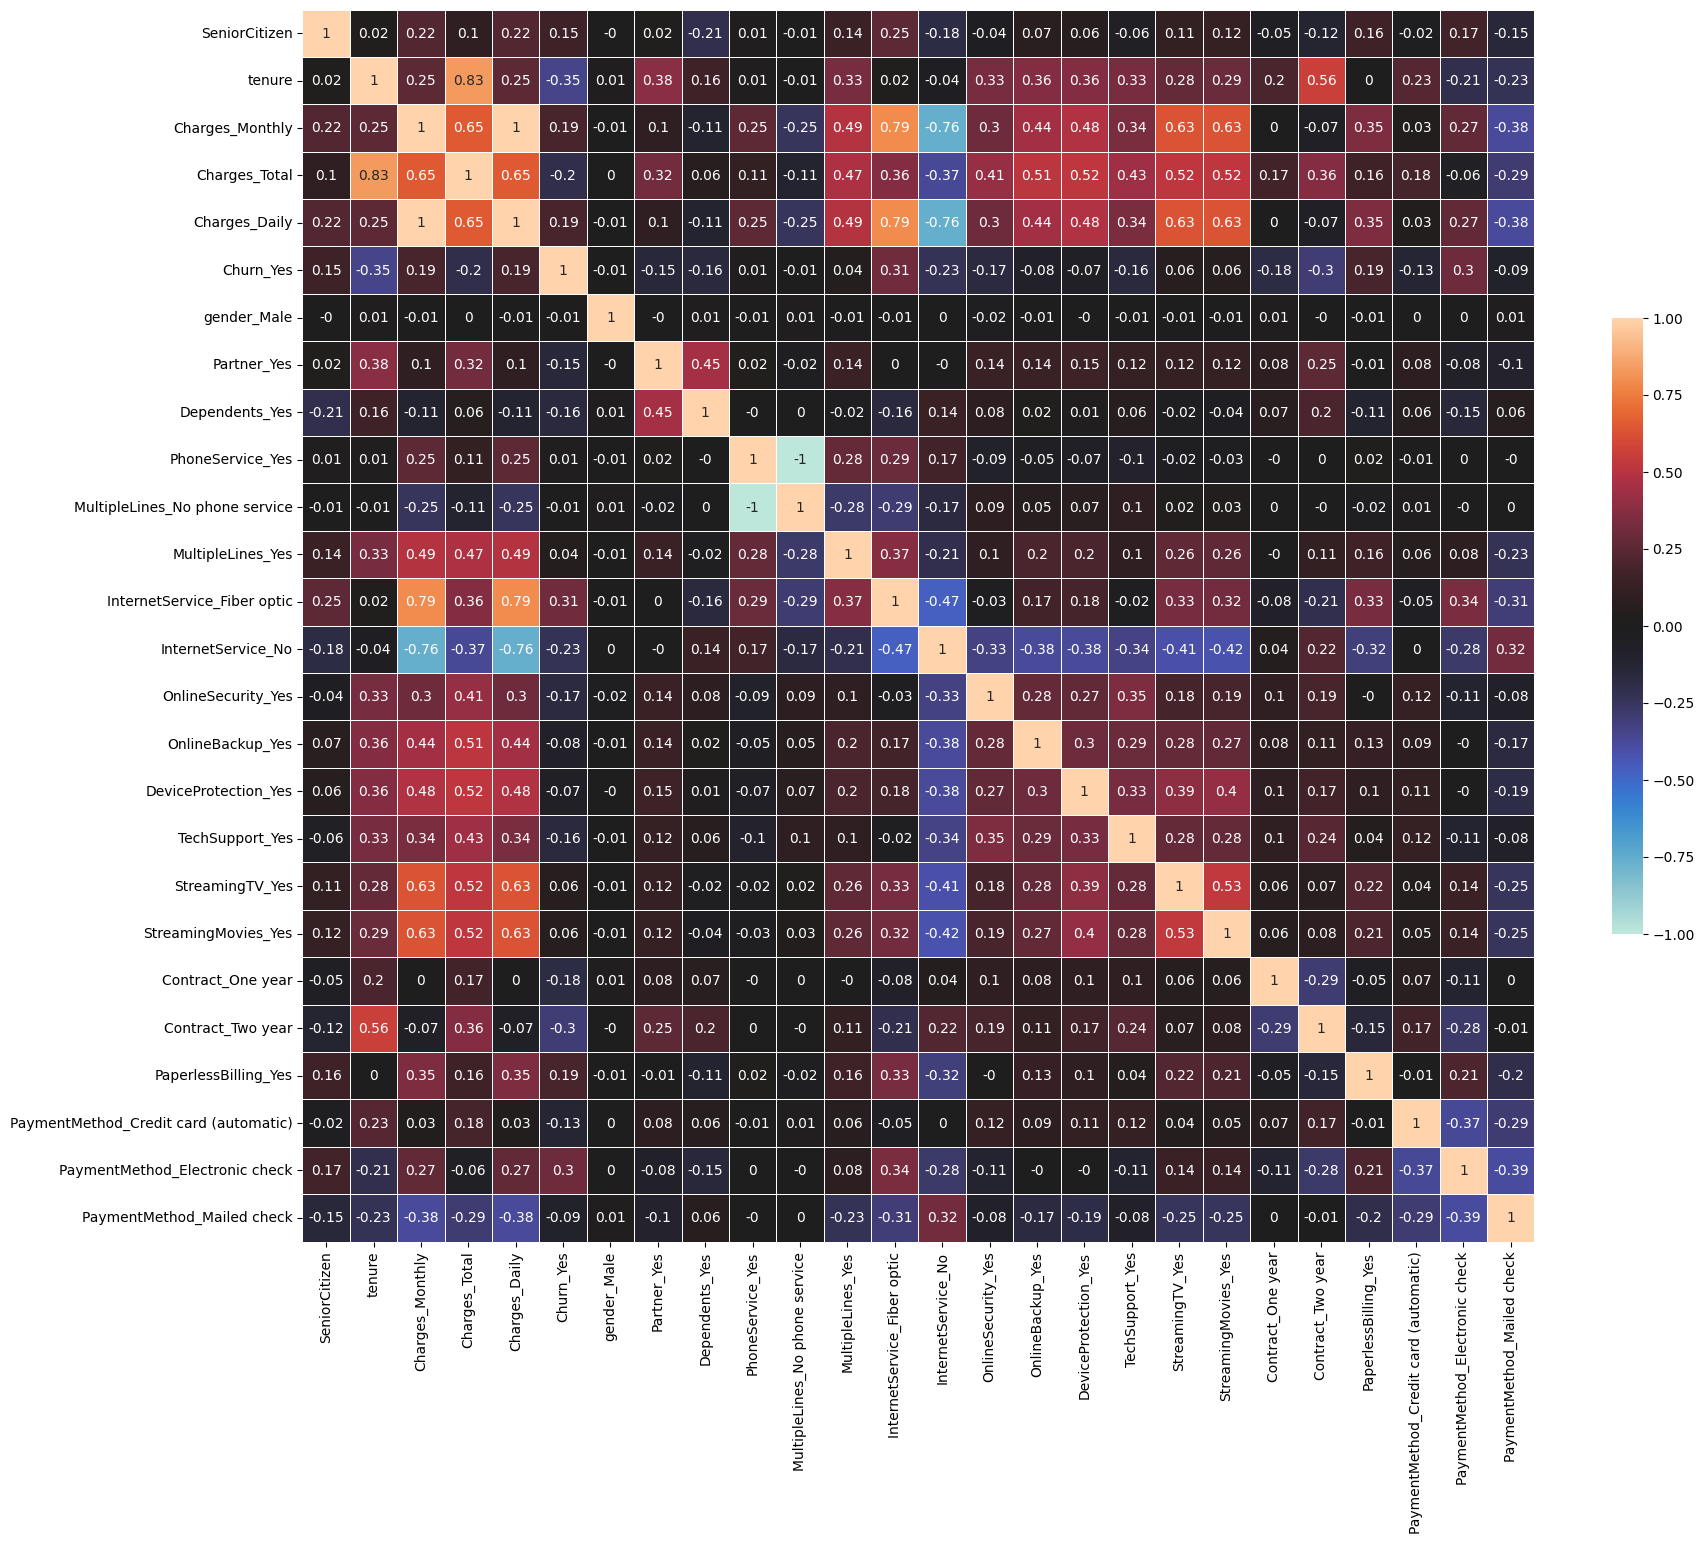

In [13]:
import numpy as np

fig, ax = plt.subplots(figsize=(20,16))
ax = sns.heatmap(np.round(corr, 2), vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

Se crea un filtro para mostrar las variables con correlación absouluta mayor o igual a 2

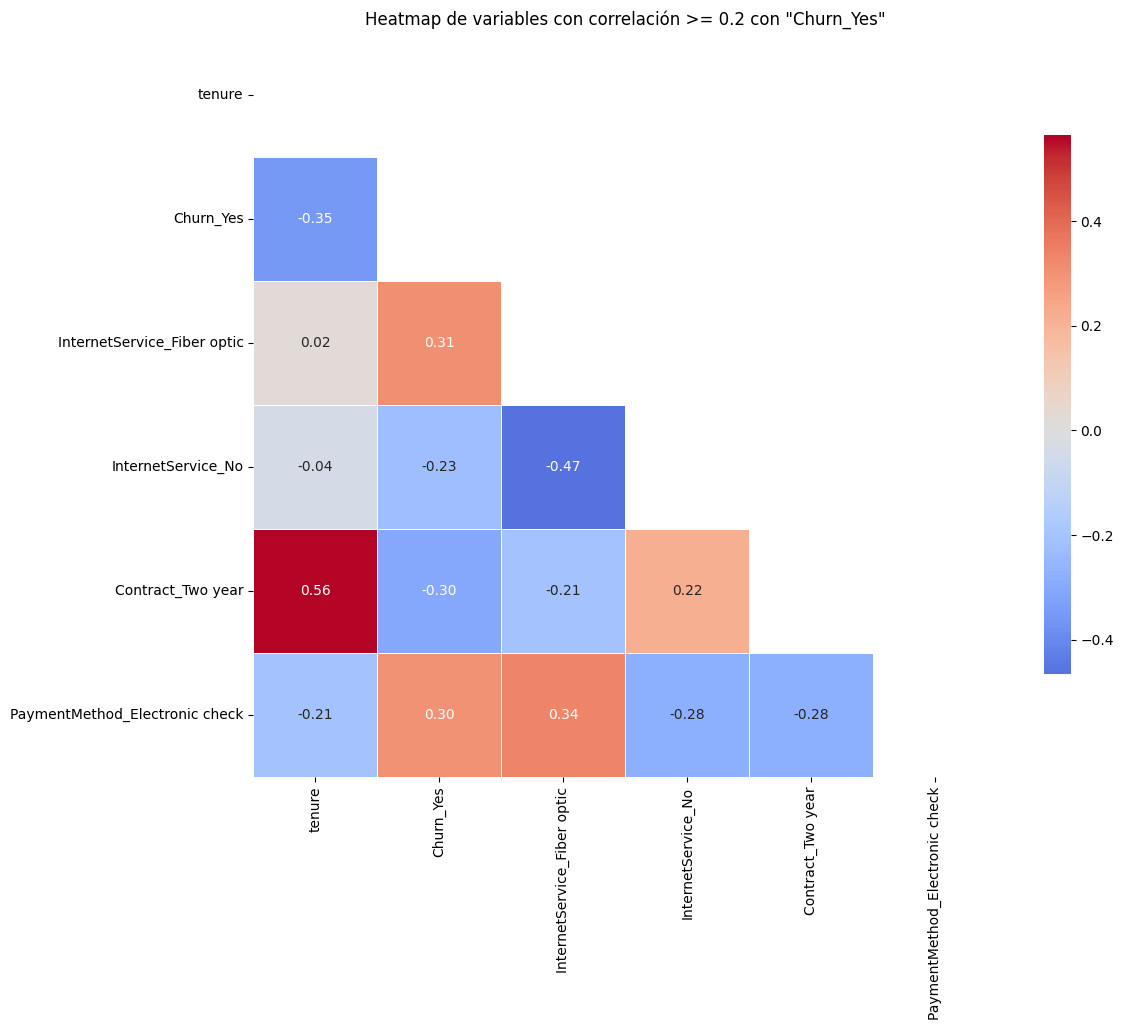

In [14]:
# Variable objetivo
target_var = 'Churn_Yes'

# Umbral mínimo de correlación absoluta para selección
limite = 0.2

# Filtrar variables que tengan correlación absoluta >= umbral con la variable objetivo
vars_relevantes = corr.index[abs(corr[target_var]) >= limite].tolist()

# Asegurar que la variable objetivo esté en la lista (si no está, añadirla)
if target_var not in vars_relevantes:
    vars_relevantes.append(target_var)

# Crear una matriz de correlación solo con las variables seleccionadas
corr_filtrada = corr.loc[vars_relevantes, vars_relevantes]

# Generar una máscara para ocultar el triángulo superior de la matriz (incluida la diagonal)
mascara = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Graficar el heatmap con la máscara aplicada para mejor visualización
plt.figure(figsize=(12,10))
sns.heatmap(
    corr_filtrada,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7},
    mask=mascara
)
plt.title(f'Heatmap de variables con correlación >= {limite} con "{target_var}"')
plt.show()

## 🔍 Análisis de Multicolinealidad

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = df_encoded.drop(columns=['Churn_Yes']) # sin variable objetivo
X_const = add_constant(X) # agregar constante

# Convertir valores booleanos en entero (0 o 1)
X_const = X_const.astype(float)

# Calcular el VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Mostrar resultado
display(vif_data.sort_values(by='VIF', ascending=False))

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,VIF
5,Charges_Daily,inf
3,Charges_Monthly,inf
9,PhoneService_Yes,inf
10,MultipleLines_No phone service,inf
12,InternetService_Fiber optic,148.500814
13,InternetService_No,104.213701
19,StreamingMovies_Yes,24.156394
18,StreamingTV_Yes,24.080019
4,Charges_Total,10.811490
2,tenure,7.584453


Descartar las columnas que no aportan y rehacer el VIF

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X_filtered = X_const.copy() # copia para no modificar el original


cols_innecesarias = [
    'PhoneService_Yes',               # Altamente colinear con "MultipleLines"
    'MultipleLines_No phone service', # Redundante
    'Charges_Daily',                  # Altamente colinear con "Charges_Total"
    'InternetService_No',              # Redundante
    'Charges_Total'                   # Altamente colinear con "Charges_Total"
]
X_filtered.drop(columns=cols_innecesarias, inplace=True)

# Asegurar que el tipo de dato sea float
X_filtered = X_filtered.astype(float)

vif_data = pd.DataFrame()
vif_data["feature"] = X_filtered.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtered.values, i) for i in range(X_filtered.shape[1])]

display(vif_data.sort_values(by="VIF", ascending=False))

,feature,VIF
0,const,29.602764
3,Charges_Monthly,17.283226
8,InternetService_Fiber optic,6.936112
2,tenure,2.826197
16,Contract_Two year,2.521228
13,StreamingTV_Yes,2.166619
14,StreamingMovies_Yes,2.163842
19,PaymentMethod_Electronic check,1.964004
20,PaymentMethod_Mailed check,1.825717
12,TechSupport_Yes,1.712098


Visualización de la relación entre Tenure y Churn

In [19]:
import plotly.express as px

fig = px.box(datos, x = 'tenure',y='Churn', color = 'Churn',title='Tenure Distribution',color_discrete_sequence=['#4DD3EB','#EB644D'])
fig.show()

## 🤖 Modelos Predictivos

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [21]:
X = df_encoded.drop(columns=['Churn_Yes'])
y = df_encoded['Churn_Yes']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

In [23]:
# Normalizar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
# Balanceo de datos
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [25]:
# Instanciar y entrenar
lr = LogisticRegression(random_state=42)
lr.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Regresión Logística")
print("Exactitud:", accuracy_score(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, y_prob_lr))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Regresión Logística
Exactitud: 0.7502369668246446
ROC AUC: 0.8454767551718145
Matriz de Confusión:
 [[1129  420]
 [ 107  454]]
              precision    recall  f1-score   support

       False       0.91      0.73      0.81      1549
        True       0.52      0.81      0.63       561

    accuracy                           0.75      2110
   macro avg       0.72      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110



In [26]:
# Instanciar y entrenar
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Predicciones
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Evaluación
print("Random Forest")
print("Exactitud:", accuracy_score(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_prob_rf))
print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest
Exactitud: 0.771090047393365
ROC AUC: 0.8195776931583714
Matriz de Confusión:
 [[1294  255]
 [ 228  333]]
              precision    recall  f1-score   support

       False       0.85      0.84      0.84      1549
        True       0.57      0.59      0.58       561

    accuracy                           0.77      2110
   macro avg       0.71      0.71      0.71      2110
weighted avg       0.77      0.77      0.77      2110



#📋 Interpretación y Conclusiones

El modelo de regresión logística obtuvo una exactitud del 75% y un área bajo la curva ROC de 0.85, lo que indica una muy buena capacidad de discriminación entre clases. El valor del AUC refleja que el modelo sí aprende patrones relevantes. En la matriz de confusión se observa que el modelo indentificó correctamente 1129 casos en los que el ciente no cancela su contrato (False),aunque con un número considerable de falsos positivos, es decir, el modelo clasificó varios casos en los que el cliente no canceló, como clientes que sí cancelaron. Por otro lado, en la clase True (cuando el cancela su contrato) el modelo alcanza un buen desempeño con 454 aciertos y un recall del 81%, lo que significa que el modelo logra capturar la mayoría de los casos positivos aun a costa de perder precisión, ya que solo el 52% de las predicciones en la que el cliente cancela son correctas. En general, este modelo de regresión logística muestra un mejor balance entre ambas clases y resulta especialmente útil cuando la prioridad es no dejar escapar casos de la clase minoritaria, es decir, cuando el cliente cancela.

En el caso del Random Forest, la exactitud global fue de 77% y el área bajo la curva ROC llegó a 0.82, lo que también refleja un buen nivel de discriminación, aunque ligeramente menor que en el modelo anterior. El rendimiento es claramente superior para la clase False, que presenta tanto una precisión como un recall cercanos al 85%, mientras que la clase True queda relegada con un recall del 59% y una precisión del 57%. Esto significa que el modelo tiende a favorecer a la clase mayoritaria, es decir, los casos en el que el cliente no cancela, y deja escapar una proporción considerable de instancias de la clase minoritaria, lo cual puede ser problemático dado que los casos True (en este caso refiriendo a la cancelacion) son de especial interés.

Comparando ambos modelos, puede decirse que el Random Forest ofrece una mejor precisión en general y es más confiable para clasificar los casos en los que el cliente no cancela su contrato, mientras que la regresión logística logra un mayor equilibrio y destaca en la detección de casos en los que el cliente cancela su contrato, aunque incurre en más falsos positivos. En términos prácticos, la elección entre ambos dependerá de las necesidades del problema: si lo más importante es detectar la mayor cantidad posible de casos positivos, la regresión logística es preferible, mientras que si el objetivo es minimizar errores de clasificación en la clase negativa, el Random Forest resulta más adecuado.